# Análise dos quartis de uma série de dados
Para o conjunto de dados a seguir:

*   Determine os quartis
*   Calcule a amplitude interquartil
*   Identifique quaisquer outliers

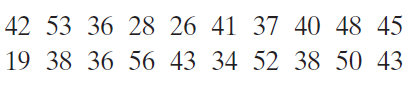

In [1]:
import pandas as pd
# Conjunto de dados
dados = pd.Series([42, 53, 36, 28, 26, 41, 37, 40, 48, 45,
                   19, 38, 36, 56, 43, 34, 52, 38, 50, 43])
# Determinação dos três quartis
quartis = dados.quantile([0.25, 0.5, 0.75], interpolation='linear')
print('Quartis em um Panda Series:')
display(quartis) # É um objeto panda Series
# Mostrando os quartis ao usuário
print('Desmembrando os quartis:')
lquartis = list(quartis)
for i in range(len(lquartis)):
  print(f'Q{str(i+1)} = {lquartis[i]}')
# Calculando a amplitude interquartil
interquartil = quartis[0.75] - quartis[0.25]
print(f'Amplitude interquartil: {interquartil}')
# Limites para detecção de outliers
lim_min = quartis[0.25] - 1.5*interquartil
lim_max = quartis[0.75] + 1.5*interquartil
print('Limites de detecção para outliers:')
print(f'Inferior = {lim_min}')
print(f'Superior = {lim_max}')
# Procurando por outliers
out_inf = dados.loc[dados <= lim_min]
print('Outlier inferior:')
display(out_inf)
out_sup = dados.loc[dados >= lim_max]
print('Outlier superior:')
display(out_sup)

Quartis em um Panda Series:


0.25    36.00
0.50    40.50
0.75    45.75
dtype: float64

Desmembrando os quartis:
Q1 = 36.0
Q2 = 40.5
Q3 = 45.75
Amplitude interquartil: 9.75
Limites de detecção para outliers:
Inferior = 21.375
Superior = 60.375
Outlier inferior:


10    19
dtype: int64

Outlier superior:


Series([], dtype: int64)

# Customizando as separatrizes
É possível customizar as separatrizes usando o método quantile(). Basta passar uma lista com os percentis desejados.

In [2]:
# Determinação dos percentis customizados
'''Seu código aqui!'''

percentis = dados.quantile([0.1, 0.35, 0.68, 0.95], interpolation='linear')
print('Percentis em um Panda Series:')
display(percentis) # É um objeto panda Series

Percentis em um Panda Series:


0.10    27.80
0.35    37.65
0.68    43.00
0.95    53.15
dtype: float64

# Análise exploratória inicial
O Pandas permite uma análise exploratória simplificada por meio do método describe().

In [3]:
# Análise exploratória
'''Seu código aqui!'''
dados.describe()

count    20.000000
mean     40.250000
std       9.306902
min      19.000000
25%      36.000000
50%      40.500000
75%      45.750000
max      56.000000
dtype: float64

# Análise dos quartis de um painel de dados
O estudo realizado nas séries pode ser facilmente estendido para o caso de painéis de dados.

In [6]:
import numpy as np 
import matplotlib.pyplot as plt 

# Importação do conjunto de dados
gorjetas = pd.read_csv("tips.csv")
print('5 primeiras linhas do conjunto de dados:')
display(gorjetas.head())
# Determinação dos quartis
quartis = gorjetas.quantile([0.25, 0.5, 0.75], axis=0,
                            interpolation='linear', numeric_only=True)
print('Tabela com os quartis para cada coluna numérica:')
display(quartis)
# Percentis customizados
percentis = gorjetas.quantile([0.1, 0.3, 0.8], axis=0,
                              interpolation='linear', numeric_only=True)
print('Tabela com percentis customizados:')
display(percentis)
# Análise exploratória inicial
print('Análise exploraória:')
gorjetas.describe()

5 primeiras linhas do conjunto de dados:


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Tabela com os quartis para cada coluna numérica:


,total_bill,tip,size
0.25,13.3475,2.0000,2.0
0.50,17.7950,2.9000,2.0
0.75,24.1275,3.5625,3.0


Tabela com percentis customizados:


,total_bill,tip,size
0.1,10.340,1.5,2.0
0.3,14.249,2.0,2.0
0.8,26.098,4.0,3.0


Análise exploraória:


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# Boxplot - Série de dados
De volta ao conjunto de dados tratado no início desse notebook:

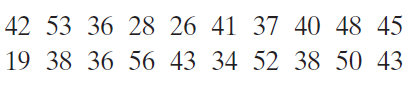

Text(0.5, 1.0, 'Distribuição dos dados')

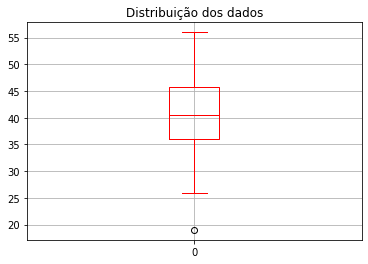

In [7]:
# É preciso transformar o Pandas Series em um Pandas DataFrame
# Não há o método boxplot para Pandas Series
df = pd.DataFrame(dados)
df.boxplot(color = 'red', vert=True, whis=1.5)
plt.title('Distribuição dos dados')

# Boxplot - Painéis de dados
De volta ao conjunto de dados tips.csv. O uso do método boxplot() tem seu total potencial realizado quando os dados são um DataFrame. Vamos checar a distribuição do valor das contas por dia de funcionamento do restaurante.

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0.5, 0.98, '')

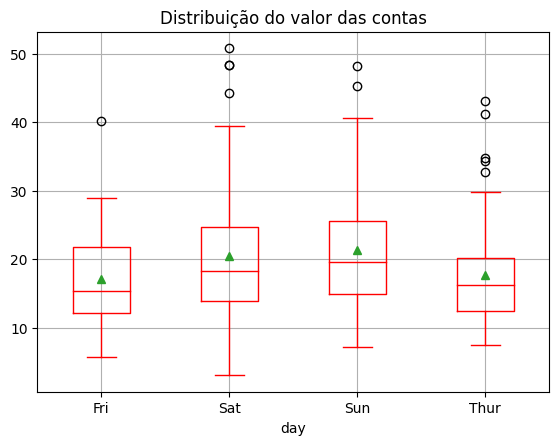

In [8]:
# Relembrando o formato dos dados
display(gorjetas.head())
# Plotand o o boxplot
'''Seu código aqui!'''

gorjetas.boxplot(by='day', column=['total_bill'], color='red',
                 whis=1.5, showmeans=True)
plt.title('Distribuição do valor das contas')
plt.suptitle('')

Agora, vamos examinar a distribuição das gorjetas por dia de funcionamento do restaurante.

Text(0.5, 0.98, '')

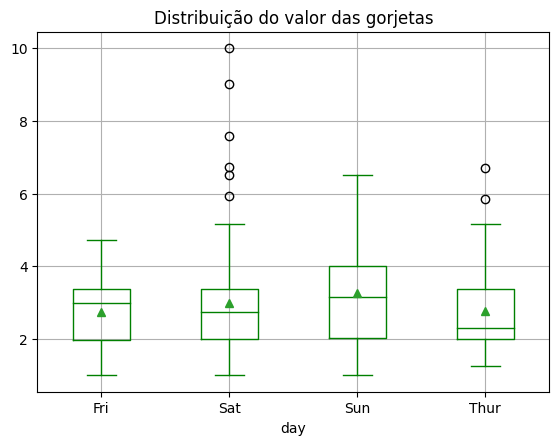

In [9]:
'''Seu código aqui!'''
gorjetas.boxplot(by='day', column=['tip'], color='green',
                 whis=1.5, showmeans=True)
plt.title('Distribuição do valor das gorjetas')
plt.suptitle('')

Qual a distribuição das gorjetas agrupada por período de funcionamento?

Text(0.5, 0.98, '')

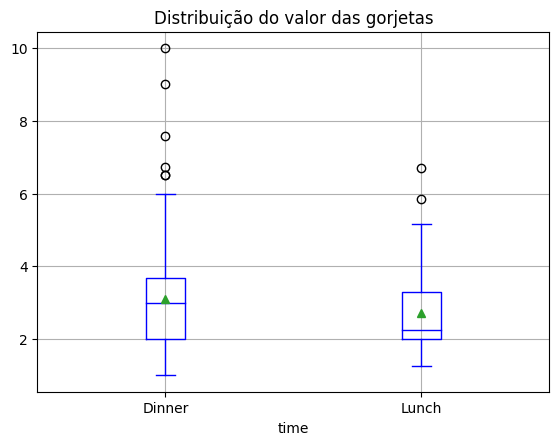

In [10]:
'''Seu código aqui!'''
gorjetas.boxplot(by='time', column=['tip'], color='blue',
                 whis=1.5, showmeans=True)
plt.title('Distribuição do valor das gorjetas')
plt.suptitle('')

Também é possível agrupar a distribuição de gorjetas usando dois ou mais fatores. Aqui, vamos agrupar por dia de funcionamento e gênero do cliente.

Text(0.5, 0.98, '')

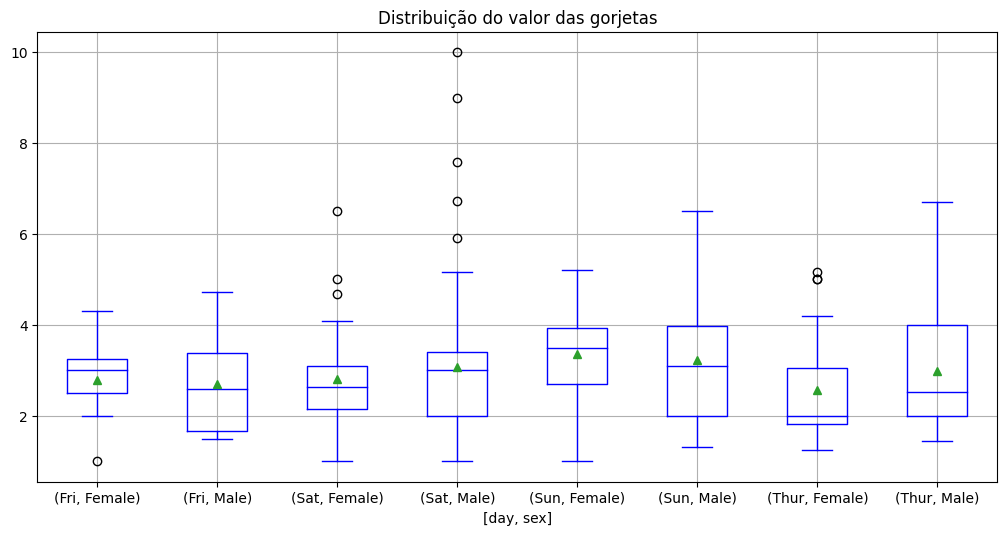

In [11]:
'''Seu código aqui!'''
gorjetas.boxplot(by=['day', 'sex'], column=['tip'],
                 color='blue', figsize=(12,6),
                 whis=1.5, showmeans=True)
plt.title('Distribuição do valor das gorjetas')
plt.suptitle('')

# Calculando escores-z


In [12]:
import scipy.stats as stats
# Criando o conjunto de dados
dados = pd.DataFrame({'Nome': ['Nik', 'Kate', 'Joe', 'Mitch', 'Alana'],
                      'Idade': [32, 30, 67, 34, 20],
                      'Renda': [80000, 90000, 45000, 23000, 12000]})
print('Tabela original:')
display(dados)
# Calculando os escores-z das colunas numéricas
'''Seu código aqui!'''
tabela_z = dados.select_dtypes(include='number').apply(stats.zscore)
print('Tabela com colunas substituidas pelos escores-z: ')
display(tabela_z)
# Agregando novas colunas com os escores-z
'''Seu código aqui!'''
dados['Escore-z Idade'] = stats.zscore(dados['Idade'])
dados['Escore-z Renda'] = stats.zscore(dados['Renda'])
print('Tabela original + escores-z: ')
display(dados)

Tabela original:


,Nome,Idade,Renda
0,Nik,32,80000
1,Kate,30,90000
2,Joe,67,45000
3,Mitch,34,23000
4,Alana,20,12000


Tabela com colunas substituidas pelos escores-z: 


,Idade,Renda
0,-0.288493,0.978700
1,-0.413925,1.304934
2,1.906565,-0.163117
3,-0.163061,-0.880830
4,-1.041085,-1.239687


Tabela original + escores-z: 


,Nome,Idade,Renda,Escore-z Idade,Escore-z Renda
0,Nik,32,80000,-0.288493,0.978700
1,Kate,30,90000,-0.413925,1.304934
2,Joe,67,45000,1.906565,-0.163117
3,Mitch,34,23000,-0.163061,-0.880830
4,Alana,20,12000,-1.041085,-1.239687
